### Blockchain Token Time Series Forcast Analysis 

This program uses a Recurrent Neural Network (LSTM) to predict the closing price of a blockchain token (Decentraland MANA). 

#### Import dependencies

In [15]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

#### Load the data

In [16]:
df = pd.read_csv('MANA-USD (1).csv')

#### Display data

In [17]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.014329,0.016111,0.013886,0.015130,0.015130,653800
2017-11-10,0.015162,0.015734,0.012645,0.012940,0.012940,296429
2017-11-11,0.013201,0.013616,0.011758,0.011979,0.011979,237865
2017-11-12,0.011975,0.011975,0.010125,0.010505,0.010505,242761
2017-11-13,0.010628,0.011660,0.010628,0.011330,0.011330,225836


In [18]:
data = df.Close
data = pd.DataFrame(data)

#### Feature Scaling , Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data 

array([[0.00084573],
       [0.00044526],
       [0.00026954],
       ...,
       [0.14685401],
       [0.15102357],
       [0.15240782]])

#### Train/ Test Split

Train

In [20]:
train_len = math.ceil(len(data)* 0.8)

train = scaled_data[0:train_len, :]
X_train = []
y_train = []

for i in range (60, len(train)):
    X_train.append(train[i-60:i,0])
    y_train.append(train[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1308, 60, 1)

Test

In [21]:
test = scaled_data[train_len-60:,:]

X_test = []
y_test = scaled_data[train_len:, :]

for i in range (60,len(test)):
    X_test.append(test[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#### Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()

#first layer with Dropout Regularization
model.add(LSTM(50, return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

#second layer with Dropout Regularization
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

#third layer with Dropout Regularization
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

#fourth layer with Dropout Regularization
model.add(LSTM(50))
model.add(Dropout(0.2))

#output
model.add(Dense(1))


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
41/41 [==============================] - 7s 76ms/step - loss: 8.2729e-04
Epoch 2/15
41/41 [==============================] - 3s 77ms/step - loss: 3.5359e-04
Epoch 3/15
41/41 [==============================] - 3s 79ms/step - loss: 2.9285e-04
Epoch 4/15
41/41 [==============================] - 3s 78ms/step - loss: 3.1075e-04
Epoch 5/15
41/41 [==============================] - 3s 77ms/step - loss: 2.9861e-04
Epoch 6/15
41/41 [==============================] - 3s 76ms/step - loss: 3.0431e-04
Epoch 7/15
41/41 [==============================] - 3s 77ms/step - loss: 1.9898e-04
Epoch 8/15
41/41 [==============================] - 3s 71ms/step - loss: 2.1323e-04
Epoch 9/15
41/41 [==============================] - 3s 68ms/step - loss: 2.2322e-04
Epoch 10/15
41/41 [==============================] - 2s 60ms/step - loss: 2.3238e-04
Epoch 11/15
41/41 [==============================] - 2s 57ms/step - loss: 2.2813e-04
Epoch 12/15
41/41 [==============================] - 3s 69ms/step - loss: 

In [24]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 29ms/step


#### Error 

In [25]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1901262867276023

#### Visualize the data

C:\Users\alex_\anaconda3\envs\Test3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


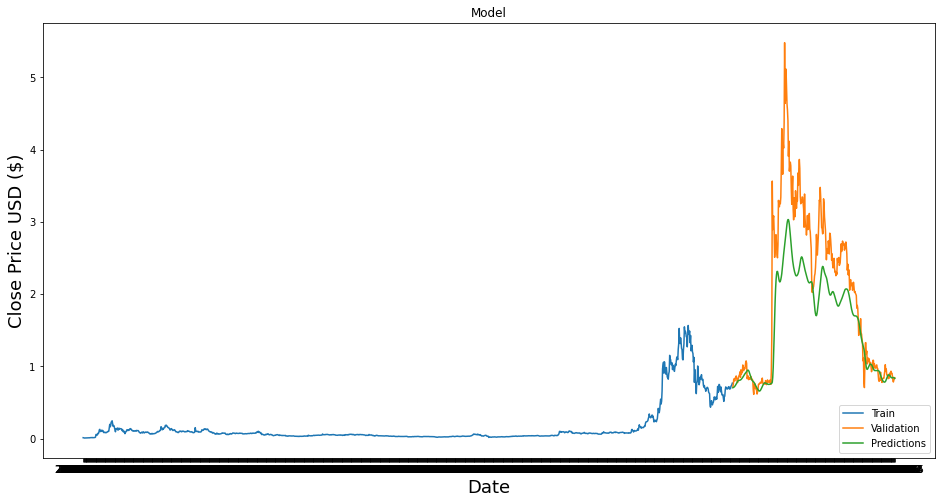

In [26]:

train = data[:train_len]
valid = data[train_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'],loc='lower right')
plt.show()

#### Actual vs Predicted Closing Price

In [27]:
valid

,Close,Predictions
Date,,
2021-08-08,0.719177,0.705903
2021-08-09,0.753815,0.709304
2021-08-10,0.828038,0.713059
2021-08-11,0.823656,0.718213
2021-08-12,0.800826,0.725476
...,...,...
2022-07-11,0.807097,0.846181
2022-07-12,0.785725,0.847749
2022-07-13,0.813602,0.846397
